# Syed Farhan Alam Zaidi
# 2018210031
# Assignment 09
Github Link: https://github.com/farhan-93/assignment09.git
## Binary- Least Square Classification on MNIST data by random vectors
Classifies digit 0 among digit 1-9

Import required libraries for the work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

Below function will load training and testing data from CSV files available

In [2]:
def data_load():
    file_data_train = "mnist_train.csv"
    file_data_test  = "mnist_test.csv"

    h_data_train    = open(file_data_train, "r")
    h_data_test     = open(file_data_test, "r")

    data_train      = h_data_train.readlines()
    data_test       = h_data_test.readlines()

    h_data_train.close()
    h_data_test.close()

    size_row    = 28    # height of the image
    size_col    = 28    # width of the image

    num_train   = len(data_train)   # number of training images
    num_test    = len(data_test)    # number of testing images

    #
    # normalize the values of the input data to be [0, 1]
    #
    def normalize(data):

        data_normalized = (data - min(data)) / (max(data) - min(data))

        return(data_normalized)

    #
    # example of distance function between two vectors x and y
    #
    def distance(x, y):

        d = (x - y) ** 2
        s = np.sum(d)
        # r = np.sqrt(s)

        return(s)

    #
    # make a matrix each column of which represents an images in a vector form 
    #
    list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
    list_label_train    = np.empty(num_train, dtype=int)

    list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
    list_label_test     = np.empty(num_test, dtype=int)

    count = 0

    for line in data_train:

        line_data   = line.split(',')
        label       = line_data[0]
        im_vector   = np.asfarray(line_data[1:])
        im_vector   = normalize(im_vector)

        list_label_train[count]     = label
        list_image_train[:, count]  = im_vector    

        count += 1

    count = 0

    for line in data_test:

        line_data   = line.split(',')
        label       = line_data[0]
        im_vector   = np.asfarray(line_data[1:])
        im_vector   = normalize(im_vector)

        list_label_test[count]      = label
        list_image_test[:, count]   = im_vector    

        count += 1

    # 
    # plot first 150 images out of 10,000 with their labels
    # 
    f1 = plt.figure(1)

    for i in range(150):

        label       = list_label_train[i]
        im_vector   = list_image_train[:, i]
        im_matrix   = im_vector.reshape((size_row, size_col))

        plt.subplot(10, 15, i+1)
        plt.title(label)
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

    #plt.show()

    #
    # plot the average image of all the images for each digit
    #
    f2 = plt.figure(2)

    im_average  = np.zeros((size_row * size_col, 10), dtype=float)
    im_count    = np.zeros(10, dtype=int)

    for i in range(num_train):

        im_average[:, list_label_train[i]] += list_image_train[:, i]
        im_count[list_label_train[i]] += 1

    for i in range(10):

        im_average[:, i] /= im_count[i]

        plt.subplot(2, 5, i+1)
        plt.title(i)
        plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

    plt.show()
    return list_image_train.T, list_label_train, list_image_test.T, list_label_test 

Function performs least square fitting with random generated vectors. And returns the model parameters.

In [3]:
def leastSquarefit(r,x,p,y):
    #indices = np.random.choice(np.arange(r.size), replace=False, size=int(p*0.36))
    #r[indices]=0
    A=np.dot(r[0],x.T)
    
    for i in range(1,len(r)):
        f=np.dot(r[i],x.T)
        A = np.c_[A,f]
        
    theta=np.empty([0, 784])
    theta=np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
    return theta

Below function performms the binary classification by trained model parameters and returns the predicted labels

In [4]:
def predict(model, X,a):
    ''' From model and data points, output prediction vectors '''
    #print(X.shape)
    results = np.zeros(X.shape[0])
    #results1 = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        results[i] = np.sign((np.dot(model.T, X[i].T))-a)
        
    return results

Below function Calculates the tp,FP,FN and TN. Aso calculate the Accuracy, Recall and F1 Scores

In [5]:
def evaluation_metrics(pred,labels):
    #pred= predict(t, X_train)
    TP=0
    for j in range(len(labels)):
        if labels[j]==1 and pred[j]==1:
            TP+=1
    print("TP = ", TP)
    FN=0
    for j in range(len(labels)):
        if labels[j]==1 and pred[j]==-1:
            FN+=1
    print("FN = ", FN)
    FP=0
    for j in range(len(labels)):
        if labels[j]!=1 and pred[j]==1:
            FP+=1
    print("FP = ", FP)
    TN=0
    for j in range(len(labels)):
        if labels[j]!=1 and pred[j]==-1:
            TN+=1
    print("TN = ", TN)
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    print("Accuracy = ", Accuracy)
    recall = TP/(TP+FN)
    print("Recall = ", recall)
    Precision = TP / (TP+FP)
    print("Precision = ", Precision)
    F1= 2*((Precision * recall)/(Precision + recall))
    print("F1 Score = ", F1)
    return F1,TP,FN,FP,TN

Below function predict the training and testing data with different numbers of model parameters by setting them to zero.

In [6]:
def diff_p():
    f_train=[]
    f_test=[]
    i=0
    while i<=0.9:
        ##### Makes copy of model parameters
        tt=np.copy(t)
        ##### randomly choice the indices with percentage i
        indices = np.random.choice(np.arange(tt.size), replace=False, size=int(tt.size * i))
        ##### set indices value to zero
        tt[indices] = 0

        print("Training Set Evaluation With paramenters set to zero randomy: ", i*100)
        pred= predict(tt, X_train,0)
        #print(labels_trian)
        f1_t,TP,FN,FP,TN=evaluation_metrics(pred,labels_trian)

        
        
        acc=metrics.accuracy_score(labels_trian1,  pred)
        print(acc)
        fpr, tpr, _ = metrics.roc_curve(labels_trian1,  pred)
        
        auc = metrics.roc_auc_score(labels_trian1, pred)
        plt.figure(i)
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()
        f_train=np.append(f_train,f1_t)
        print("=============")
        
        print("Testing Set Evaluation With paramenters set to zero randomy in percent: ", i*100)
        pred_test= predict(tt, X_test,0.25)
        f1_tt,TP_t,FN_t,FP_t,TN_t=evaluation_metrics(pred_test,labels_test1)
        acc=metrics.accuracy_score(labels_test1,  pred_test)
        print(acc)
        fpr, tpr, _ = metrics.roc_curve(labels_test1,  pred_test)
        
        auc = metrics.roc_auc_score(labels_test1, pred_test)
        plt.figure(i*2)
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()
        f_test=np.append(f_test,f1_tt)
        print("======================================================================")
        i+=0.10
    return f_train, f_test

This is the main function and execution starts here

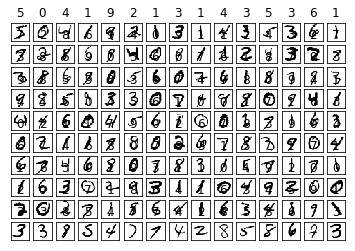

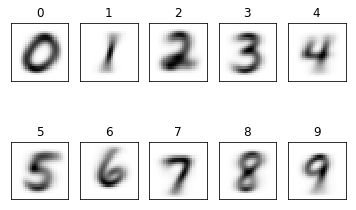

In [7]:
if __name__ == "__main__":
    X_train, labels_trian, X_test, labels_test=data_load()
    #print("Hello")
    mean = 0
    std = 1
    p= 494
    r=np.random.normal(mean, std, (784,784))
    t=leastSquarefit(r,X_train,p,labels_trian)
    
    #### Convert labels of training data in 1 and -1. (1 for digit zero and -1 for non zero)
    labels_trian1 = labels_trian
    for j in range(len(labels_trian1)):
        if labels_trian1[j] <=0:
            labels_trian1[j]=1
        else:
            labels_trian1[j]=-1
    #### Convert labels of testing data in 1 and -1. (1 for digit zero and -1 for non zero)
    labels_test1 = labels_test
    for j in range(len(labels_test1)):
        if labels_test1[j] <=0:
            labels_test1[j]=1
        else:
            labels_test1[j]=-1

In [8]:
    #### predict the training data with all 784 parameters
    pred= predict(t, X_train,0)
    print("Training Set Evaluation With paramenters 784")
    f_t,TP,FN,FP,TN =evaluation_metrics(pred,labels_trian1)
    #### predict the testing data with all 784 parameters
    pred_test= predict(t, X_test,0)
    print("Training Set Evaluation With paramenters 784")
    f_tt,TP_t,FN_t,FP_t,TN_t=evaluation_metrics(pred_test,labels_test1)

Training Set Evaluation With paramenters 784
TP =  1131
FN =  4792
FP =  21679
TN =  32398
Accuracy =  0.5588166666666666
Recall =  0.19095053182508864
Precision =  0.04958351600175362
F1 Score =  0.07872481119270525
Training Set Evaluation With paramenters 784
TP =  185
FN =  795
FP =  3594
TN =  5426
Accuracy =  0.5611
Recall =  0.18877551020408162
Precision =  0.04895474993384493
F1 Score =  0.07774742592981719


Training Set Evaluation With paramenters set to zero randomy:  0
TP =  1131
FN =  4792
FP =  21679
TN =  32398
Accuracy =  0.5588166666666666
Recall =  0.19095053182508864
Precision =  0.04958351600175362
F1 Score =  0.07872481119270525
0.5588166666666666


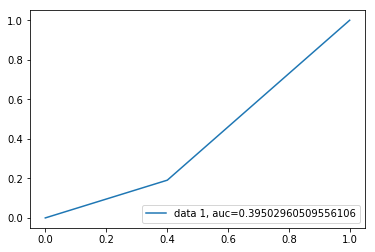

Testing Set Evaluation With paramenters set to zero randomy in percent:  0
TP =  184
FN =  796
FP =  3590
TN =  5430
Accuracy =  0.5614
Recall =  0.18775510204081633
Precision =  0.048754636989931106
F1 Score =  0.07740849810685739
0.5614


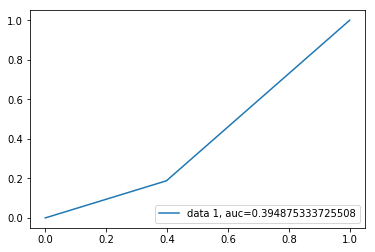

Training Set Evaluation With paramenters set to zero randomy:  10.0
TP =  2188
FN =  3735
FP =  31298
TN =  22779
Accuracy =  0.4161166666666667
Recall =  0.3694073949012325
Precision =  0.06534073941348623
F1 Score =  0.11104062523788982
0.4161166666666667


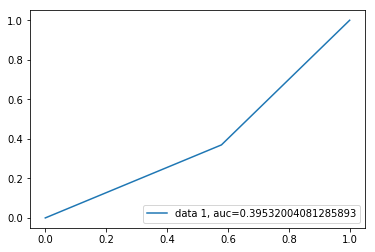

Testing Set Evaluation With paramenters set to zero randomy in percent:  10.0
TP =  394
FN =  586
FP =  5256
TN =  3764
Accuracy =  0.4158
Recall =  0.4020408163265306
Precision =  0.06973451327433629
F1 Score =  0.11885369532428357
0.4158


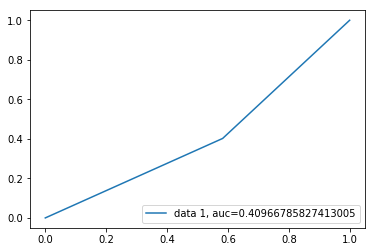

Training Set Evaluation With paramenters set to zero randomy:  20.0
TP =  1777
FN =  4146
FP =  18476
TN =  35601
Accuracy =  0.6229666666666667
Recall =  0.30001688333614723
Precision =  0.0877400878882141
F1 Score =  0.13577322738386308
0.6229666666666667


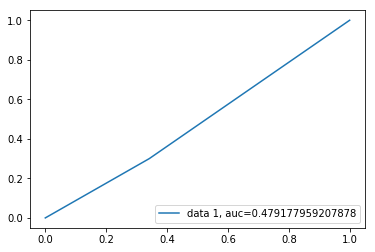

Testing Set Evaluation With paramenters set to zero randomy in percent:  20.0
TP =  305
FN =  675
FP =  3060
TN =  5960
Accuracy =  0.6265
Recall =  0.3112244897959184
Precision =  0.09063893016344725
F1 Score =  0.14039125431530494
0.6265


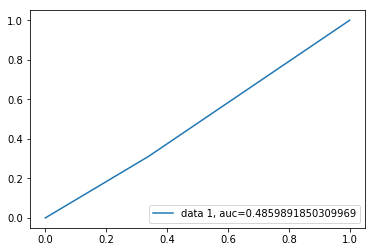

Training Set Evaluation With paramenters set to zero randomy:  30.000000000000004
TP =  47
FN =  5876
FP =  8743
TN =  45334
Accuracy =  0.75635
Recall =  0.007935167989194665
Precision =  0.005346985210466439
F1 Score =  0.006388907768639977
0.75635


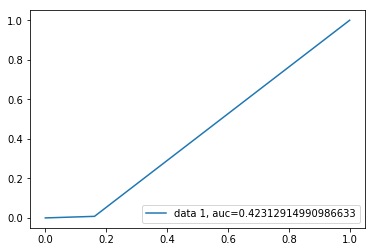

Testing Set Evaluation With paramenters set to zero randomy in percent:  30.000000000000004
TP =  6
FN =  974
FP =  1487
TN =  7533
Accuracy =  0.7539
Recall =  0.006122448979591836
Precision =  0.004018754186202277
F1 Score =  0.004852405984634048
0.7539


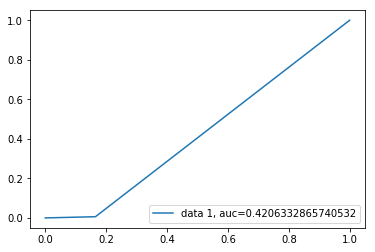

Training Set Evaluation With paramenters set to zero randomy:  40.0
TP =  212
FN =  5711
FP =  4238
TN =  49839
Accuracy =  0.8341833333333334
Recall =  0.0357926726321121
Precision =  0.04764044943820225
F1 Score =  0.0408753494649571
0.8341833333333334


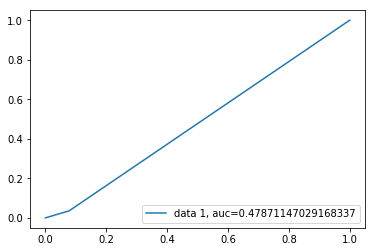

Testing Set Evaluation With paramenters set to zero randomy in percent:  40.0
TP =  36
FN =  944
FP =  634
TN =  8386
Accuracy =  0.8422
Recall =  0.036734693877551024
Precision =  0.05373134328358209
F1 Score =  0.04363636363636364
0.8422


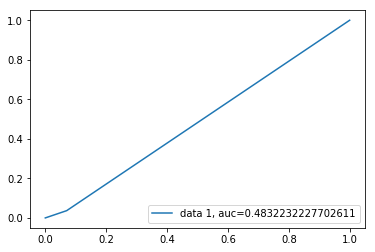

Training Set Evaluation With paramenters set to zero randomy:  50.0
TP =  1215
FN =  4708
FP =  15103
TN =  38974
Accuracy =  0.6698166666666666
Recall =  0.2051325341887557
Precision =  0.07445765412427993
F1 Score =  0.10925767726271302
0.6698166666666666


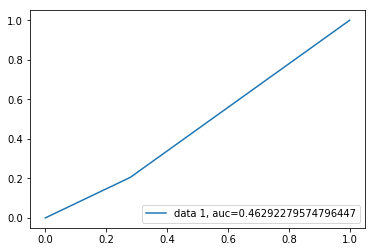

Testing Set Evaluation With paramenters set to zero randomy in percent:  50.0
TP =  189
FN =  791
FP =  2396
TN =  6624
Accuracy =  0.6813
Recall =  0.19285714285714287
Precision =  0.07311411992263056
F1 Score =  0.10603085553997194
0.6813


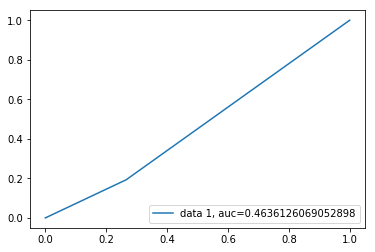

Training Set Evaluation With paramenters set to zero randomy:  60.0
TP =  2289
FN =  3634
FP =  22110
TN =  31967
Accuracy =  0.5709333333333333
Recall =  0.3864595644099274
Precision =  0.0938153203000123
F1 Score =  0.15097948684123738
0.5709333333333333


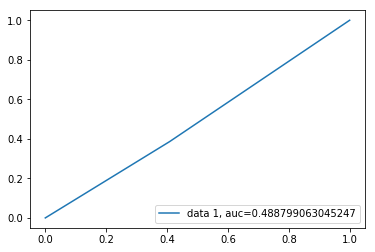

Testing Set Evaluation With paramenters set to zero randomy in percent:  60.0
TP =  370
FN =  610
FP =  3633
TN =  5387
Accuracy =  0.5757
Recall =  0.37755102040816324
Precision =  0.09243067699225581
F1 Score =  0.14850491671683722
0.5757


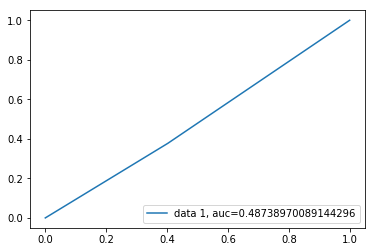

Training Set Evaluation With paramenters set to zero randomy:  70.0
TP =  2168
FN =  3755
FP =  26598
TN =  27479
Accuracy =  0.49411666666666665
Recall =  0.36603072767178796
Precision =  0.07536675241604672
F1 Score =  0.12499639655222115
0.49411666666666665


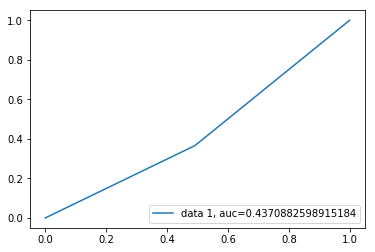

Testing Set Evaluation With paramenters set to zero randomy in percent:  70.0
TP =  334
FN =  646
FP =  4464
TN =  4556
Accuracy =  0.489
Recall =  0.3408163265306122
Precision =  0.06961233847436432
F1 Score =  0.11561093804084459
0.489


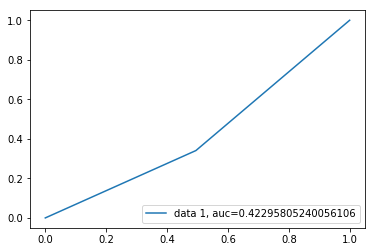

Training Set Evaluation With paramenters set to zero randomy:  80.0
TP =  4907
FN =  1016
FP =  18854
TN =  35223
Accuracy =  0.6688333333333333
Recall =  0.8284653047442174
Precision =  0.2065148773199781
F1 Score =  0.33061581997035444
0.6688333333333333


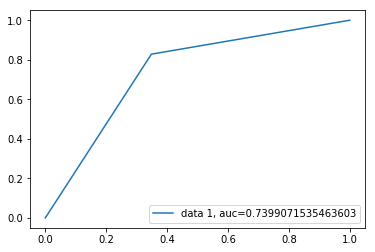

Testing Set Evaluation With paramenters set to zero randomy in percent:  80.0
TP =  825
FN =  155
FP =  3086
TN =  5934
Accuracy =  0.6759
Recall =  0.8418367346938775
Precision =  0.21094349271286117
F1 Score =  0.3373543242690657
0.6759


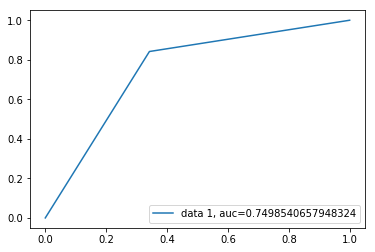

Training Set Evaluation With paramenters set to zero randomy:  89.99999999999999
TP =  559
FN =  5364
FP =  15069
TN =  39008
Accuracy =  0.65945
Recall =  0.09437784906297485
Precision =  0.035769132326593296
F1 Score =  0.05187694306528699
0.65945


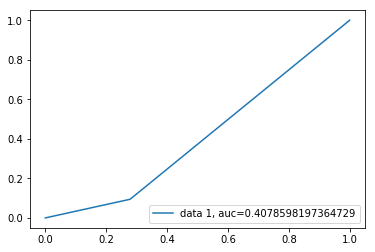

Testing Set Evaluation With paramenters set to zero randomy in percent:  89.99999999999999
TP =  67
FN =  913
FP =  2344
TN =  6676
Accuracy =  0.6743
Recall =  0.06836734693877551
Precision =  0.02778929904603899
F1 Score =  0.03951636685343557
0.6743


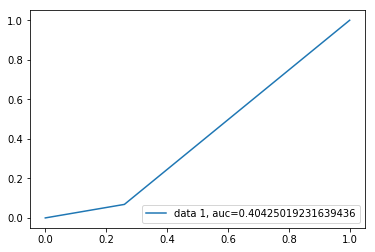

In [16]:
    #### Below function predict the training and testing data with different 
    #### numbers of model parameters by setting them to zero.
    f_train, f_test= diff_p()

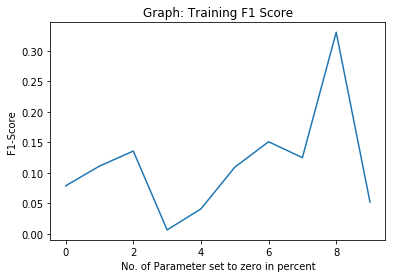

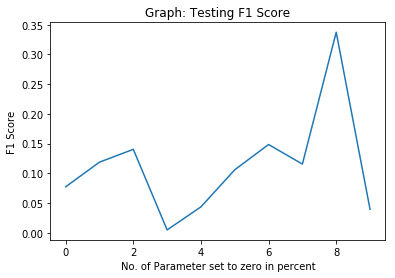

In [17]:
plt.figure(100)
plt.title("Graph: Training F1 Score")
plt.xlabel("No. of Parameter set to zero in percent") 
plt.ylabel("F1-Score")
plt.plot(f_train)
plt.figure(101)
plt.title("Graph: Testing F1 Score")
plt.xlabel("No. of Parameter set to zero in percent") 
plt.ylabel("F1 Score")
plt.plot(f_test)

#### Below code Calculated the average images of TP,TN, FP, FN

In [11]:
    labels_train1=labels_trian
    TPl=[]
    TP=0
    for j in range(len(labels_train1)):
        #print(j)
        if labels_train1[j]==1 and pred[j]==1:
            TP+=1
            TPl=TPl+[j]
    print("TP = ", TP)
    TN=0
    TNl=[]
    for j in range(len(labels_train1)):
        if labels_train1[j]!=1 and pred[j]==-1:
            TN+=1
            TNl=TNl+[j]
    print("TN = ", TN)
    FN=0
    FNl=[]
    for j in range(len(labels_train1)):
        if labels_train1[j]!=1 and pred[j]==-1:
            FN+=1
            FNl=FNl+[j]
    print("FN = ", FN)
    FP=0
    FPl=[]
    for j in range(len(labels_train1)):
        if labels_train1[j]!=1 and pred[j]==-1:
            FP+=1
            FPl=FPl+[j]
    print("FP = ", FP)

TP =  1131
TN =  32398
FN =  32398
FP =  32398


Average image of True Postive


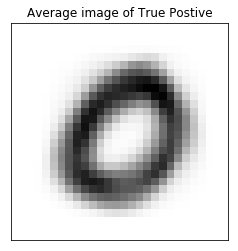

In [12]:
    print("Average image of True Postive")
    X_train1=X_train.T
    im_average  = np.zeros((28 * 28), dtype=float)
    #im_count    = np.zeros(10, dtype=int)

    for i in TPl:

        im_average[:] += X_train1[:, i]
        #TP[labels_train1[i]] += 1

    im_average /= TP

    plt.plot()
    plt.title("Average image of True Postive")
    plt.imshow(im_average[:].reshape((28, 28)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    

    plt.show()

Average image of True Negative


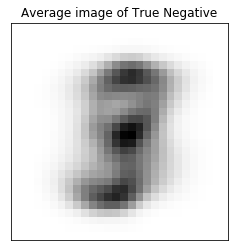

In [13]:
    print("Average image of True Negative")
    X_train1=X_train.T
    im_average  = np.zeros((28 * 28), dtype=float)
    #im_count    = np.zeros(10, dtype=int)

    for i in TNl:

        im_average[:] += X_train1[:, i]
        #TP[labels_train1[i]] += 1

    im_average /= TN

    plt.plot()
    plt.title("Average image of True Negative")
    plt.imshow(im_average[:].reshape((28, 28)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    

    plt.show()

Average image of False Positive


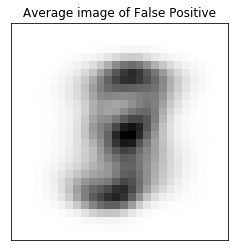

In [14]:
    print("Average image of False Positive")
    X_train1=X_train.T
    im_average  = np.zeros((28 * 28), dtype=float)
    #im_count    = np.zeros(10, dtype=int)

    for i in FPl:

        im_average[:] += X_train1[:, i]
        #TP[labels_train1[i]] += 1

    im_average /= FP

    plt.plot()
    plt.title("Average image of False Positive")
    plt.imshow(im_average[:].reshape((28, 28)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    

    plt.show()

Average image of False Negative


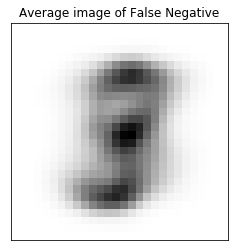

In [15]:
    print("Average image of False Negative")
    X_train1=X_train.T
    im_average  = np.zeros((28 * 28), dtype=float)
    #im_count    = np.zeros(10, dtype=int)

    for i in FNl:

        im_average[:] += X_train1[:, i]
        #TP[labels_train1[i]] += 1

    im_average /= FN

    plt.plot()
    plt.title('Average image of False Negative')
    plt.imshow(im_average[:].reshape((28, 28)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    

    plt.show()

The results shows that when 80 %  of the parameter are set to zero randomly it shows the best F1 score and highest Area Under Curve (AUC).